# House Sales in King County, USA

In this notebook, we will analyze and predict housing prices using attributes or features such as square footag, number of bedrooms, number of floors and so on.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [5]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Wrangling

In [6]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Identify Missing Data

In [8]:
missing_data = df.isnull().sum()
missing_data[missing_data > 0] 

bedrooms     13
bathrooms    10
dtype: int64

Here we can see that 13 values are missing from bedrooms column and 10 values are missing from bathrooms columns

### Deal with missing data

In [9]:
#Replace missing numerical data with its mean
avg_bedrooms = df['bedrooms'].mean()
avg_bathrooms = df['bathrooms'].mean()
df['bedrooms'].replace(np.nan, avg_bedrooms, inplace=True)
df['bathrooms'].replace(np.nan, avg_bathrooms, inplace=True)

In [10]:
#check again missing data
missing_data = df.isnull().sum()
missing_data[missing_data > 0] 

Series([], dtype: int64)

### Correct Data Format

In [11]:
#check data type
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

All data format are correct

## Exploratory Data Analysis

Now we check what are the main features which affect the price of the houses

### Analyze Individual Pattern using Visulaization

In [12]:
#numerical data
df_num = df.drop(['price','date'],axis=1)
df_num.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
len(df_num.columns)

19

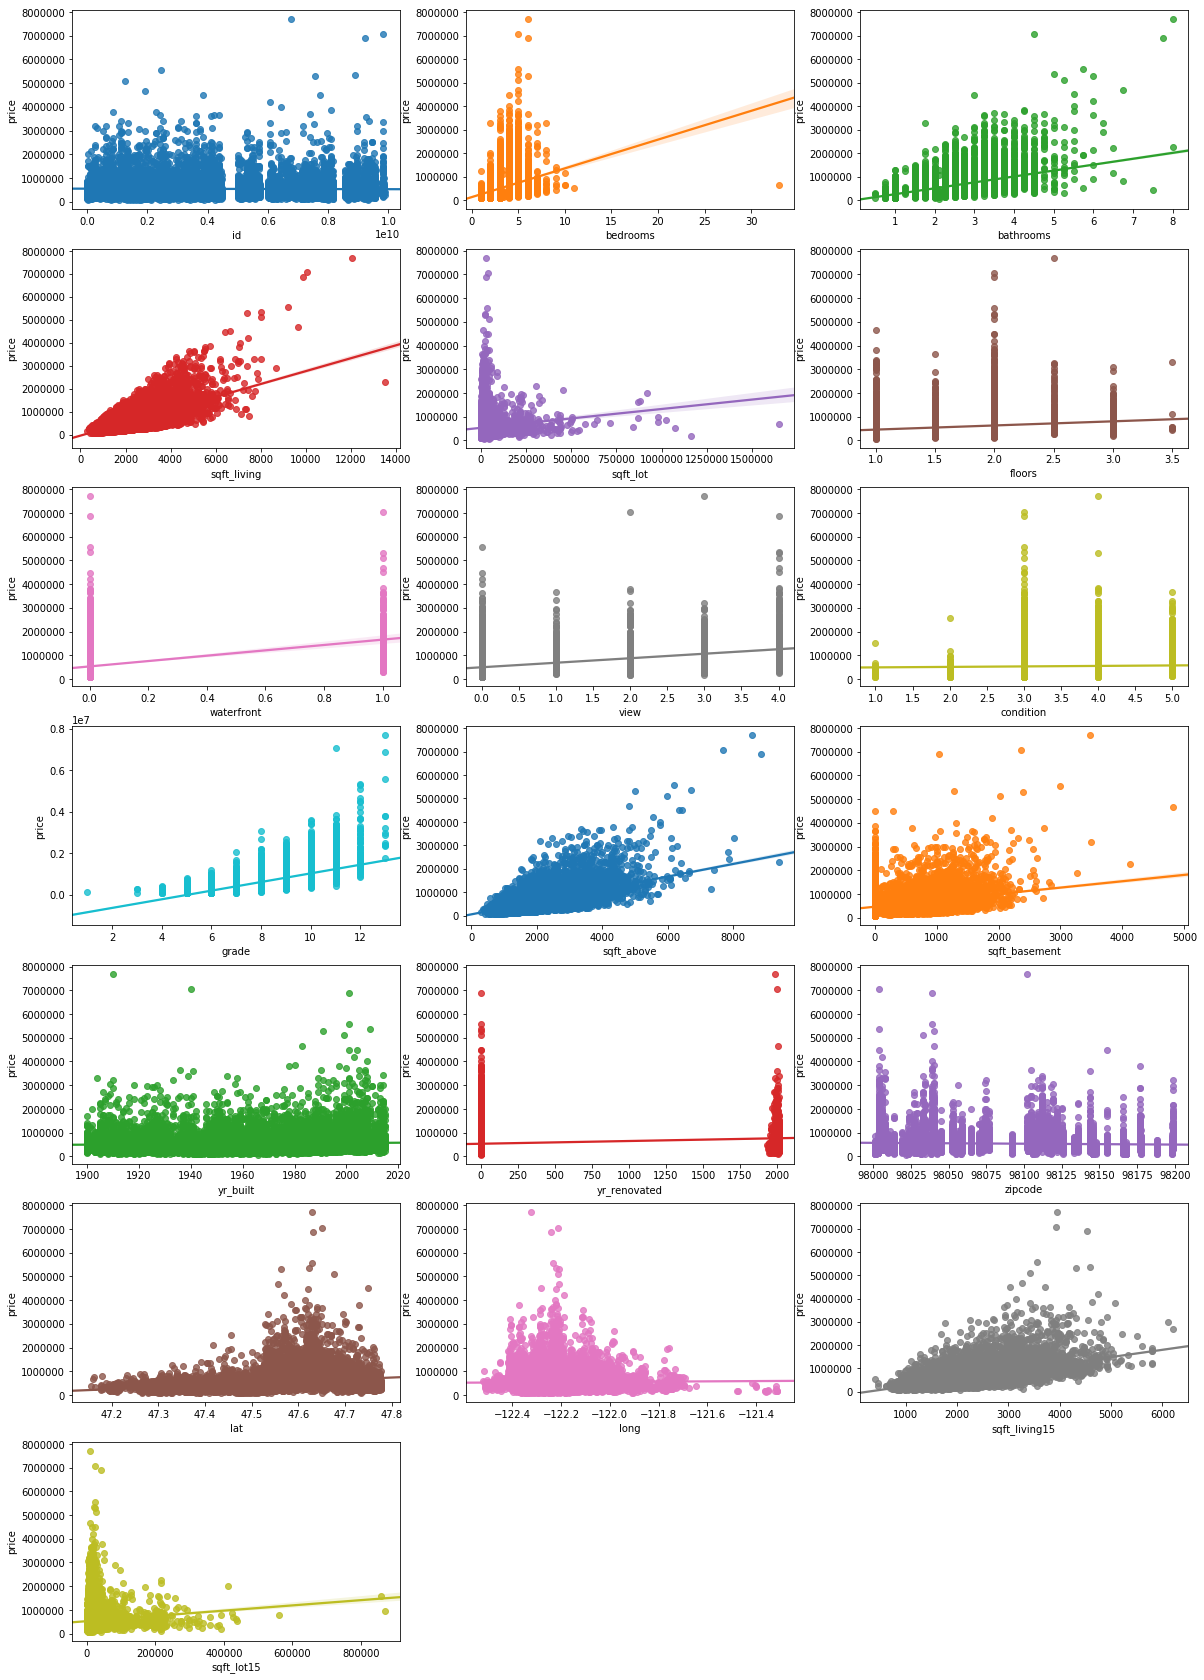

In [14]:
fig, axes = plt.subplots(7,3, figsize=(20,30))
counts = 0
for i in range(7):
    for j in range(3):
        if counts < 19:
            sns.regplot(x=df_num.columns[counts],y='price',data=df,ax=axes[i][j])
            counts +=1
        else:
            axes[i][j].axis('off')

From the above result we can say that the important variable which might affect the house prices are :

**Positive Relationship**
- bedrooms
- bathrooms
- sqtft-living
- grade
- sqft-above
- sqft_lot15
- sqft_living15
- sqft-basement
- waterfront
- view
- floors

**No relationship**
- long
- lat
- zipcode
- yr-renovated
- yr-build
- id
- condition
- sqft-lot

### Pearson Correlation

In [15]:
pearson_coef,p_value = stats.pearsonr(df["sqft_lot15"], df['price'])
print("Pearson Coefficient of {} :\t Coef {:.2f} and P-value {}".format(df_num.columns[i],pearson_coef, p_value))

Pearson Coefficient of waterfront :	 Coef 0.08 and P-value 6.417559889335015e-34


In [16]:
for i in range(len(df_num.columns)):
    pearson_coef,p_value = stats.pearsonr(df_num[df_num.columns[i]], df['price'])
    print("Pearson Coefficient of {} :\t Coef {:.2f} and P-value {}".format(df_num.columns[i],pearson_coef, p_value))

Pearson Coefficient of id :	 Coef -0.02 and P-value 0.013728056567365528
Pearson Coefficient of bedrooms :	 Coef 0.31 and P-value 0.0
Pearson Coefficient of bathrooms :	 Coef 0.53 and P-value 0.0
Pearson Coefficient of sqft_living :	 Coef 0.70 and P-value 0.0
Pearson Coefficient of sqft_lot :	 Coef 0.09 and P-value 7.972504510326147e-40
Pearson Coefficient of floors :	 Coef 0.26 and P-value 1.6e-322
Pearson Coefficient of waterfront :	 Coef 0.27 and P-value 0.0
Pearson Coefficient of view :	 Coef 0.40 and P-value 0.0
Pearson Coefficient of condition :	 Coef 0.04 and P-value 8.935654062344094e-08
Pearson Coefficient of grade :	 Coef 0.67 and P-value 0.0
Pearson Coefficient of sqft_above :	 Coef 0.61 and P-value 0.0
Pearson Coefficient of sqft_basement :	 Coef 0.32 and P-value 0.0
Pearson Coefficient of yr_built :	 Coef 0.05 and P-value 1.929872809374955e-15
Pearson Coefficient of yr_renovated :	 Coef 0.13 and P-value 1.0213478858043326e-77
Pearson Coefficient of zipcode :	 Coef -0.05 an

From the above result we can say that:

- bedrooms has weak relationship
- bathrooms has moderate relationship
- sqft_living has strong relationship
- floors has weak relationship
- waterfront has weak relationship
- view has weak relationship
- grade has moderate relationship
- sqft_above has moderate relationship
- sqft_basement has weak relationship
- lat has weak relationship
- sqft_living15 has moderate relationship

### Important Variables

- bedrooms
- bathrooms
- sqft_living
- floors
- waterfront
- view
- grade
- sqft_above
- sqft_basement
- lat
- sqft_living15

**Count the number of houses with unique floor values.**

## Model Development

### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

As sqft_living has highest correlation coefficient so it might be the potential feature to predict price

In [18]:
x = df[['sqft_living']]
y = df['price']

In [19]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
yhat_lr = lr.predict(x)
print("Predicted prices are : ",yhat_lr[0:5])

Predicted prices are :  [287555.06702452 677621.82640197 172499.40418656 506441.44998452
 427866.85097324]


In [21]:
intercept = lr.intercept_
coef = lr.coef_
print("Final Estimate Model:\nPrice = {} + {} * sqft_living".format(intercept,coef) )

Final Estimate Model:
Price = -43580.743094473844 + [280.6235679] * sqft_living


### Multiple Linear Regression Model

In [22]:
z = df[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']] 

In [23]:
lr.fit(z,y)
yhat_mlr = lr.predict(z)
yhat_mlr[0:5]

array([283270.39007446, 662572.30128727, 306267.58455123, 408476.54986747,
       532313.8077508 ])

In [24]:
intercept = lr.intercept_
coef = lr.coef_
print("Intercept : ",intercept)
print("Coefficient : ",coef)

Intercept :  -32390308.398632057
Coefficient :  [-2.59674430e+04 -3.22416757e+03  1.29355789e+02 -2.92790793e+04
  6.02002523e+05  6.70824472e+04  8.20072277e+04  6.49412868e+01
  6.44145024e+01  6.72993098e+05  4.44293114e+00]


**Price = intercept + coef0 * bedrooms + coef1 * bathrooms+ coef2 * sqft_living + coef3 * floors + coef4 * waterfront + coef5 * view + coef6 * grade + coef7 * sqft_above + coef8 * sqft_basement + coef9 * lat + coef10 * sqft_living15**

### Polynomial Regression Model

For Single variable

In [25]:
x = df['sqft_living']
y = df['price']

In [26]:
f = np.polyfit(x,y,3) #3rd degree order
p = np.poly1d(f)
print("Estimated model is : ",p)

Estimated model is :              3           2
-3.841e-06 x + 0.08705 x - 90.18 x + 3.368e+05


For Multivariate polynomial

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
pr = PolynomialFeatures(degree=2)

In [29]:
z_pr = pr.fit_transform(z)

In [30]:
z.shape

(21613, 11)

In [31]:
z_pr.shape

(21613, 78)

### Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [35]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [36]:
pipe.fit(z,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [37]:
ypipe = pipe.predict(z)
ypipe[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([349598. , 559267. , 449441. , 393359.5, 521746. ])